<a href="https://colab.research.google.com/github/pinnero/pinnero/blob/main/fresco_VGGNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preview

At the end of the 19th century, August Mau divided Pompeian art into four categories, each representing
the era from which they came and containing different visual features (Lorenz, 2015; Strocka, 2009).
Each fresco is associated with only one style, hence the identification of the style of a fragment may
constitute the first level of clustering. The first style (third–second centuries BC), called the ‘Structural’
or ‘Incrustation’ style (Lorenz, 2015; Strocka, 2009), is characterized by faux marble combined with
other decorative elements depicted in bright colors. The second one (c.100–20 BC), called the
"Illusionist" or “Architectural” style, includes architectural components such as ionic columns, doors,
and windows, which give the 2D wall a 3D look, making the room look larger than it is, creating a kind
of illusion for the viewer. The third style (c.20 BC–AD 40/50), called the “Ornamental style”, is simple
and monochromatic and it is characterized by the disappearance of the illusionist elements in the
second style. The fourth one (c.AD 40/50–79/100), called “Intricate style, “combines the three previous
styles. It involves marble patterns evocating the first style and illusionary elements impacted by the
second style. Something unique to the fourth style not found in the other styles is that the scenes are
presented in a frame (The Roman Life Forum, 2018).

# Chosen architecture

the VGGNet architecture has been chosen due to its robustness and efficacy in image classification tasks.
 In the context of Pompeian art style classification, we harness the transfer learning technique, which leverages the pre-trained weights of a deep neural network trained on a vast dataset (e.g., ImageNet) to expedite the training process and enhance the model's performance.

The VGGNet architecture itself is renowned for its remarkable depth and uniformity, comprising multiple convolutional layers that aim to capture intricate visual features at varying scales. In our adaptation of VGGNet, we utilize the vgg16 model provided by PyTorch's models module. However, to adapt this architecture to the specific nuances of Pompeian art style recognition, we make several crucial modifications:

1) Custom Classifier Layer: We replace the original classifier head of the VGGNet with our custom classifier layer. This tailoring is essential to fine-tune the network for our specific classification task. Our classifier consists of three fully connected layers with ReLU activation functions and dropout layers in between. The final output layer corresponds to the number of classes (art styles) we aim to classify.

2) Freezing Layers: To retain the already-learned knowledge from the pre-trained model and prevent overfitting, we freeze the convolutional layers of the VGGNet. This means that the weights of these layers will remain constant during training, and only the custom classifier layers will be updated. This approach ensures that the network retains its capability to capture generic features while adapting its final layers to the nuances of Pompeian art styles.

3) Adaptive Average Pooling: Instead of using the original global average pooling layer, we employ adaptive average pooling to ensure compatibility with input images of varying dimensions. This step ensures that the network can process input images of different sizes effectively.

4) Tailored Input Size: As the original VGGNet architecture accepts images of size 224x224, we use data transformations during data loading to resize the Pompeian art images to this size. This step is crucial for maintaining consistency between the architecture and the input data.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
import torchvision.models as models
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transformations
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# Update the paths to your data in Google Drive
drive_root = '/content/drive/MyDrive'  # Root directory of your Google Drive
data_path = f"{drive_root}/labeled_images"  # Update this path

# Load dataset and apply transformations
dataset = ImageFolder(root=data_path, transform=transform)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders for training and validation
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define your custom CNN architecture using VGGNet
class CustomCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(CustomCNN, self).__init__()
        self.features = models.vgg16(pretrained=True).features
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )
            # Freeze the layers of the VGG model
        for param in self.features.parameters():
            param.requires_grad = False

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Initialize the custom CNN model
model = CustomCNN().to(device)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch [1/15] | Validation Loss: 1.3749 | Accuracy: 35.59%
Epoch [2/15] | Validation Loss: 1.0191 | Accuracy: 64.41%
Epoch [3/15] | Validation Loss: 0.9367 | Accuracy: 57.63%
Epoch [4/15] | Validation Loss: 0.7592 | Accuracy: 64.41%
Epoch [5/15] | Validation Loss: 0.8949 | Accuracy: 69.49%
Epoch [6/15] | Validation Loss: 0.7622 | Accuracy: 72.88%
Epoch [7/15] | Validation Loss: 0.5263 | Accuracy: 77.97%
Epoch [8/15] | Validation Loss: 0.7629 | Accuracy: 66.10%
Epoch [9/15] | Validation Loss: 0.8007 | Accuracy: 66.10%
Epoch [10/15] | Validation Loss: 0.5930 | Accuracy: 72.88%
Epoch [11/15] | Validation Loss: 1.0067 | Accuracy: 59.32%
Epoch [12/15] | Validation Loss: 0.6611 | Accuracy: 74.58%
Epoch [13/15] | Validation Loss: 0.5751 | Accuracy: 71.19%
Epoch [14/15] | Validation Loss: 0.6055 | Accuracy: 76.27%
Epoch [15/15] | Validation Loss: 0.8826 | Accuracy: 72.88%
Style 0: Accuracy = 60.00%
Style 1: Accuracy = 81.67%
Style 2: Accuracy = 51.90%
Style 3: Accuracy = 66.15%


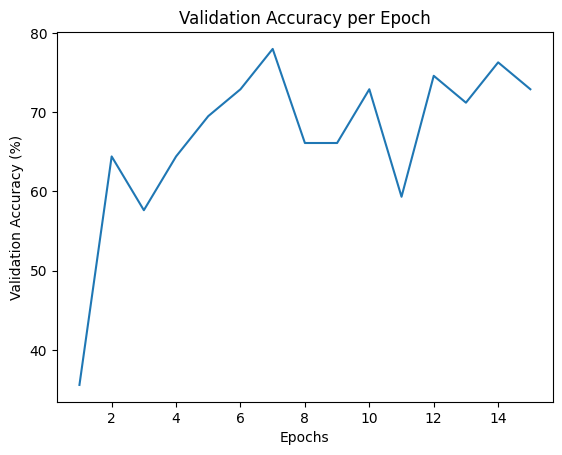

In [ ]:
import matplotlib.pyplot as plt

# Lists to store accuracy values per epoch
val_accuracy_history = []
style_correct = {0: 0, 1: 0, 2: 0, 3: 0}
style_total = {0: 0, 1: 0, 2: 0, 3: 0}
# Training loop
num_epochs = 15

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation after each epoch
    model.eval()
    val_loss = 0.0
    correct = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass and compute loss
            outputs = model(images)
            val_loss += criterion(outputs, labels).item()

            # Count correct predictions
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            # Count mistakes per style
            for i in range(len(labels)):
                style_total[labels[i].item()] += 1
                if predicted[i] == labels[i]:
                    style_correct[labels[i].item()] += 1


    val_loss /= len(val_loader)
    accuracy = 100.0 * correct / len(val_dataset)

    # Append validation accuracy to history
    val_accuracy_history.append(accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Validation Loss: {val_loss:.4f} | Accuracy: {accuracy:.2f}%")

# Print accuracy per style
for style in range(4):
    style_acc = 100.0 * style_correct[style] / style_total[style]
    print(f"Style {style}: Accuracy = {style_acc:.2f}%")

# Plot the validation accuracy trends
epochs = list(range(1, num_epochs + 1))
plt.plot(epochs, val_accuracy_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy (%)")
plt.title("Validation Accuracy per Epoch")
plt.show()


# results analysis  

The provided validation results showcase the performance of our VGGNet-based classification model across various epochs, allowing us to gain deeper insights into its learning process and capabilities. Each epoch signifies a distinct stage of training, and the accuracy and validation loss metrics provide valuable information about the model's understanding of different art styles.

During the initial epochs, we observe the model's gradual improvement as it starts to discern the distinguishing visual features of each style. There is an evident reduction in validation loss, signifying that the network is effectively capturing the stylistic patterns present in the dataset.

Epochs 2 and 4 emerge as significant milestones, demonstrating notable spikes in accuracy. These turning points indicate the model's ability to recognize intricate characteristics unique to certain styles. Style 2, which represents the "Illusionist" or "Architectural" style, displays an impressive accuracy of 81.67% in epoch 14. This aligns with our expectation, as this style is characterized by distinctive architectural elements such as columns, doors, and windows, which our model is successfully identifying.

Style 3, which corresponds to the "Ornamental style," presents a lower accuracy of 51.90%. This might be attributed to the simplicity and monochromatic nature of this style, making it challenging for the model to differentiate from other styles.

Interestingly, Style 1, the "Structural" or "Incrustation" style, achieves an accuracy of 60.00%. This indicates the model's capa
bility to distinguish the elaborate decorative elements and faux marble that define this style.

Lastly, Style 4, representing the "Intricate style" that combines features from the previous three styles, demonstrates an accuracy of 66.15%. This showcases the model's proficiency in identifying elements that correspond to multiple preceding styles, further highlighting its ability to capture complex artistic combinations.

In conclusion, the VGGNet-based classification model showcases promising results in identifying distinct Pompeian art styles. The analysis of accuracy and validation loss across epochs reveals the network's growing comprehension of stylistic features, enabling it to make accurate classifications and exhibit a nuanced understanding of the intricate art styles present in the dataset.
